#Introduction

In this notebook we will use a clustering algorithm to analyze our data (i.e. YouTube comments of a single video).
This will help us extract topics of discussion.
We use the embeddings generated in Assignment 4 as input. 
(This notebook will not run without first running the assignment 4 Notebook, as it relies on the data in the folder 'output/')
Each of our comments has been assigned a vector that encodes information about its meaning.
The closer two vectors are, the more similar the meaning.

Each vector is of 512 Dimensions.

Before we can cluster our data we need to reduce the embeddings' dimensionality to overcome the curse of dimensionality.
We use the UMAP ALgorithm for this.

After that we use the KMedoids Algorithm to partition the embedding space and generate our clusters this way.

We need to define the number of clusters we want to have. 
To find the optimal number of clusters, we use a simple optimization scheme.

Once the clusters are created, we visualize them.
To do this we reduce the dimensionality of the embeddings again to two dimensions.
Then we render a scatterplot of our data.

Furthermore we want to analyze and interpret our clusters.
To do this, we:
- print some statistics about each of the clusters
- print cluster's medoid (the central sample)
- print the cluster(s) we want to analyze further

Check to see if jupyter lab uses the correct python interpreter with '!which python'.
It should be something like '/opt/anaconda3/envs/[environment name]/bin/python' (on Mac).
If not, try this: https://github.com/jupyter/notebook/issues/3146#issuecomment-352718675

In [2]:
!conda activate Seminar_csma
!where python

C:\Users\xinyu\anaconda3\envs\Seminar_csma\python.exe
C:\Users\xinyu\AppData\Local\Programs\Python\Python38\python.exe
C:\Users\xinyu\AppData\Local\Programs\Python\Python37\python.exe
C:\Users\xinyu\AppData\Local\Microsoft\WindowsApps\python.exe


# Install dependencies:

In [3]:
install_packages = True
if install_packages:    
    !conda install -c conda-forge umap-learn -y
    !conda install -c conda-forge scikit-learn-extra -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



# Imports

In [4]:
#imports

import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import umap
from sklearn_extra.cluster import KMedoids
import seaborn as sns
#from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, OPTICS
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances

# Functions to Save and load manually

In [5]:
# Save and load your data after clustering

def save_results():
    data.to_pickle(output_path+'data_clustered'+'.pkl')
    
def load_results():
    data = pd.read_pickle(output_path+'data_clustered'+'.pkl')
    

In [6]:
# Set pandas print options
#This will improve readability of printed pandas dataframe.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Set global Parameters
Set your parameters here:

output_path: Files generated in this notebook will be saved here.

model_type: Define which model was used to produce the embeddings. (Check the name of the .npy-file containing the embeddings)

In [7]:
output_path = "./output/"
model_type = 'Transformer' #@param ['DAN','Transformer','Transformer_Multilingual']

# Load Data
Load the preprocessed data as a pandas dataframe.
And load the embeddings as a numpy ndarray (a matrix in our case).

In [8]:
data = pd.read_pickle(output_path+'data_preprocessed'+'.pkl')
labels_default = np.zeros(len(data.index))-1
data['label_manual'] = labels_default

In [9]:
embeddings = np.load(output_path+'/embeddings'+model_type+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

# Dimensionality reduction with UMAP

We reduce the number of dimensions of our embeddings to make possibly present clusters more pronounced. 
The number of dimensions (num_dimensions) depends on the number of samples

In [10]:
# Set the number of dimensions to reduce to
num_dimensions =100

reducer_clustering = umap.UMAP(n_neighbors=50, 
                     n_components=num_dimensions, 
                     metric='cosine', 
                     #n_epochs=200, 
                     learning_rate=.5,
                     init='spectral', 
                     min_dist=0,
                     #spread=5.0, 
                     #set_op_mix_ratio=1.0, 
                     #local_connectivity=1.0, 
                     #negative_sample_rate=5, 
                     #transform_queue_size=4.0, 
                     force_approximation_algorithm=True, 
                     unique=True)
embeddings_umap = reducer_clustering.fit_transform(embeddings)

# Optimize the Number of Clusters

n_clusters: 2 silhouette_avg: 0.38384587
n_clusters: 52 silhouette_avg: 0.29767624
n_clusters: 102 silhouette_avg: 0.3194653
n_clusters: 152 silhouette_avg: 0.2781972
n_clusters: 202 silhouette_avg: 0.26423904
n_clusters: 252 silhouette_avg: 0.21788064
n_clusters: 302 silhouette_avg: 0.17863216
n_clusters: 352 silhouette_avg: 0.12920384


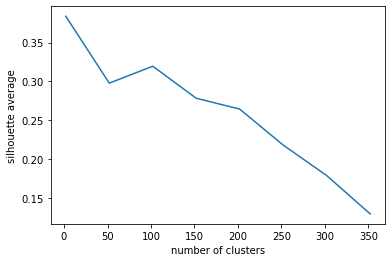

In [12]:
#optimize number of clusters
optimize_number_of_clusters = True#@param {type:'boolean'}

# I changed the number of medoids since the number of samples is less than 1000.
min_clusters=2 
max_clusters=400 
step=50

if optimize_number_of_clusters:
    rows_list = []
    inertias = []
    n_clusters = []
    silouette_scores = []
    init_param = 'k-medoids++' #@param ['random', 'heuristic', 'k-medoids++']
    random_state_param=1234 #@param {type:'number'}
    for i in range(min_clusters,max_clusters, step):
        temp_clustering = KMedoids(n_clusters=i, metric='euclidean', init=init_param, max_iter=200, random_state=random_state_param).fit(embeddings_umap)
        silhouette_avg = silhouette_score(embeddings_umap, temp_clustering.labels_)
        print("n_clusters:",i, "silhouette_avg:",silhouette_avg)
        silhouette_dict = {'number of clusters': i, 'silhouette average': silhouette_avg}
        rows_list.append(silhouette_dict)
    results = pd.DataFrame(rows_list)
    sns.lineplot(x = 'number of clusters', y = 'silhouette average',data = results)

n_clusters: 2 silhouette_avg: 0.38384587
n_clusters: 27 silhouette_avg: 0.2999863
n_clusters: 52 silhouette_avg: 0.29767624
n_clusters: 77 silhouette_avg: 0.3025686
n_clusters: 102 silhouette_avg: 0.3194653
n_clusters: 127 silhouette_avg: 0.31670678
n_clusters: 152 silhouette_avg: 0.2781972
n_clusters: 177 silhouette_avg: 0.27570882
n_clusters: 202 silhouette_avg: 0.26423904
n_clusters: 227 silhouette_avg: 0.2448687
n_clusters: 252 silhouette_avg: 0.21788064
n_clusters: 277 silhouette_avg: 0.20194288
n_clusters: 302 silhouette_avg: 0.17863216
n_clusters: 327 silhouette_avg: 0.1554795
n_clusters: 352 silhouette_avg: 0.12920384
n_clusters: 377 silhouette_avg: 0.09451257


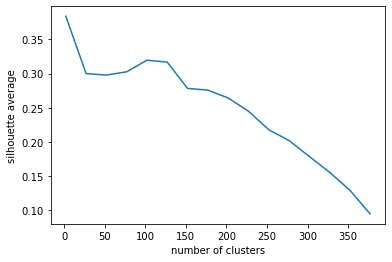

In [13]:
#Just try with other cluster setting

#optimize number of clusters
optimize_number_of_clusters = True#@param {type:'boolean'}

# I changed the number of medoids since the number of samples is less than 1000.
min_clusters=2 
max_clusters=400 
step=25

if optimize_number_of_clusters:
    rows_list = []
    inertias = []
    n_clusters = []
    silouette_scores = []
    init_param = 'k-medoids++' #@param ['random', 'heuristic', 'k-medoids++']
    random_state_param=1234 #@param {type:'number'}
    for i in range(min_clusters,max_clusters, step):
        temp_clustering = KMedoids(n_clusters=i, metric='euclidean', init=init_param, max_iter=200, random_state=random_state_param).fit(embeddings_umap)
        silhouette_avg = silhouette_score(embeddings_umap, temp_clustering.labels_)
        print("n_clusters:",i, "silhouette_avg:",silhouette_avg)
        silhouette_dict = {'number of clusters': i, 'silhouette average': silhouette_avg}
        rows_list.append(silhouette_dict)
    results = pd.DataFrame(rows_list)
    sns.lineplot(x = 'number of clusters', y = 'silhouette average',data = results)

The highest sihouette score is more desirable. We can see that the highest sihouette score is when the number of clusters is 0, but it is clearly not our pursued cluster number. So the seconde best choice in our data sample is around 100 which has a sihouette score around 0.32.

# Clustering with KMedoids

In [14]:
number_of_clusters =  100
init_param = 'k-medoids++' #@param ['random', 'heuristic', 'k-medoids++']
clustering_model = KMedoids(n_clusters=number_of_clusters,
                            metric='cosine', 
                            init=init_param, 
                            max_iter=150, 
                            random_state=None).fit(embeddings_umap)
clustering_model
labels = clustering_model.labels_
data["label_kmedoids"] = labels
print("cluster","members", data["label_kmedoids"].value_counts().sort_values())

clustering_model.inertia_

medoids_indices = clustering_model.medoid_indices_

cluster members 77     1
29     1
78     1
12     1
42     1
54     1
75     1
56     1
45     2
89     2
81     2
83     2
92     2
19     2
93     2
96     2
97     2
2      2
1      2
91     2
76     2
18     2
21     2
47     2
73     2
0      2
60     2
95     2
38     2
52     2
50     2
28     2
31     2
55     2
27     3
41     3
3      3
49     3
98     3
86     3
87     3
70     3
94     3
58     3
59     3
68     3
66     3
22     3
71     3
88     3
36     3
32     3
99     4
23     4
9      4
90     4
10     4
39     4
84     4
85     4
34     4
82     4
16     4
17     4
67     4
69     4
57     4
25     5
65     5
26     5
72     5
40     5
20     5
79     5
80     5
15     5
74     5
46     6
4      6
11     6
33     6
35     6
63     7
30     7
44     7
43     7
24     7
61     8
13     8
48     8
7      8
6      9
64     9
62    10
51    10
14    12
53    13
8     13
37    13
5     16
Name: label_kmedoids, dtype: int64


In [15]:
#calculate distances
distances = np.diag(pairwise_distances(X = clustering_model.cluster_centers_[labels], Y = embeddings_umap[:], metric='cosine'))
data["distance_kmedoids"] = distances

# Dimensionality Reduction for Visualization

In [16]:
num_dimensions =2

reducer_visualization = umap.UMAP(n_neighbors=50, 
                                  n_components=num_dimensions, 
                                  metric='cosine', 
                                  output_metric='euclidean', 
                                  #n_epochs=200, 
                                  learning_rate=.5,
                                  init='spectral', 
                                  min_dist=.1,
                                  spread=5.0, 
                                  set_op_mix_ratio=1.0, 
                                  local_connectivity=1.0, 
                                  negative_sample_rate=5, 
                                  transform_queue_size=4.0, 
                                  force_approximation_algorithm=True, 
                                  unique=True)
embeddings_umap_2d = reducer_visualization.fit_transform(embeddings)

C:\Users\xinyu\anaconda3\envs\Seminar_csma\lib\site-packages\umap\umap_.py:1158: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


# Visualize clustering results

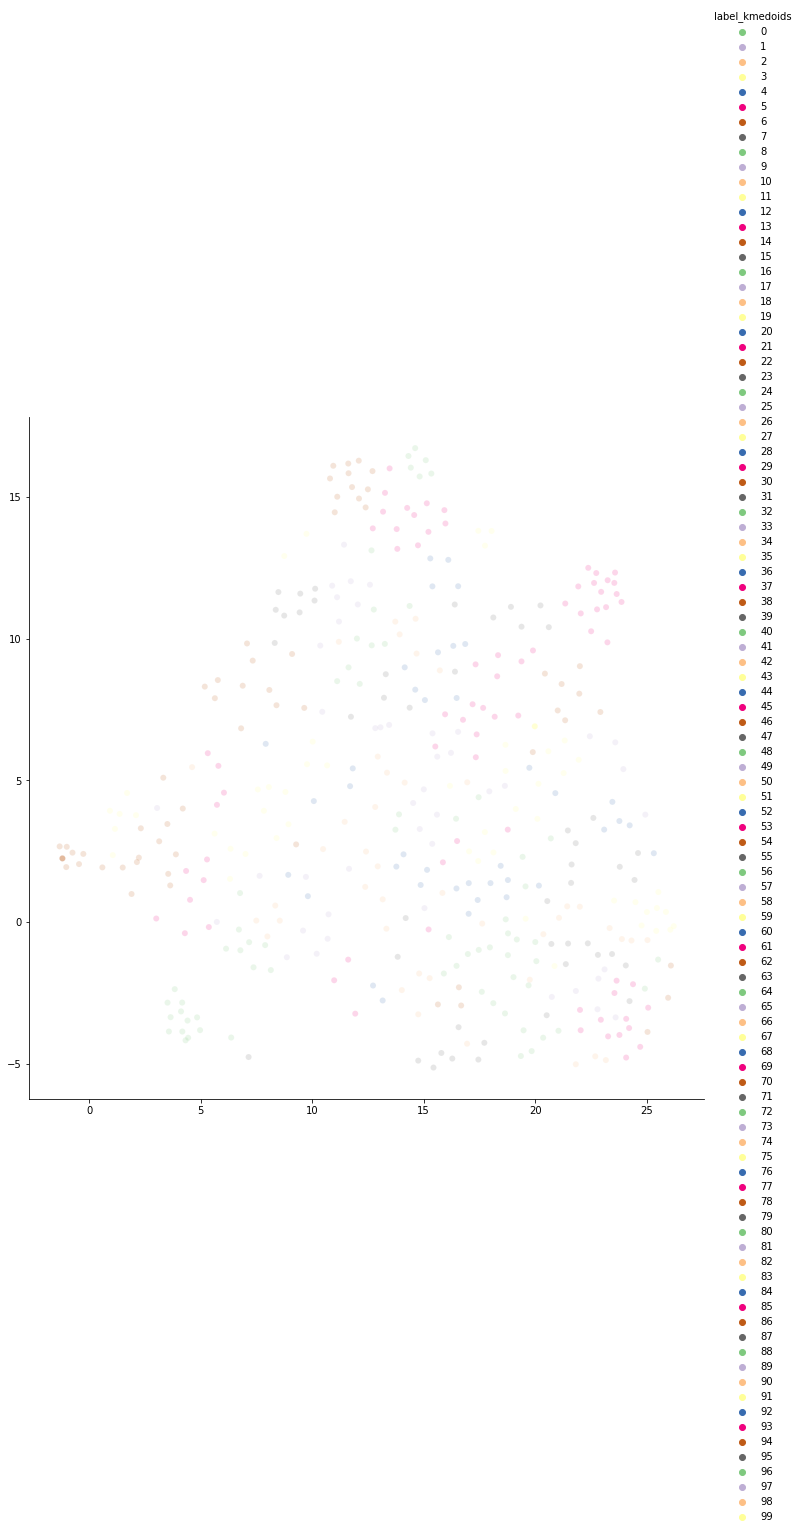

In [17]:
#@markdown Set the color palette used for visualizing different clusters
palette_param = "Accent" #@param ['Accent','cubehelix', "tab10", 'Paired', "Spectral"]
#@markdown Set opacity of data points (1 = opaque, 0 = invisible)
alpha_param = 0.16 #@param {type:"slider", min:0, max:1, step:0.01}


sns.relplot(x = embeddings_umap_2d[:, 0], y = embeddings_umap_2d[:, 1],  hue = data['label_kmedoids'], palette = palette_param,alpha = alpha_param,height = 10)


## Highlight one cluster

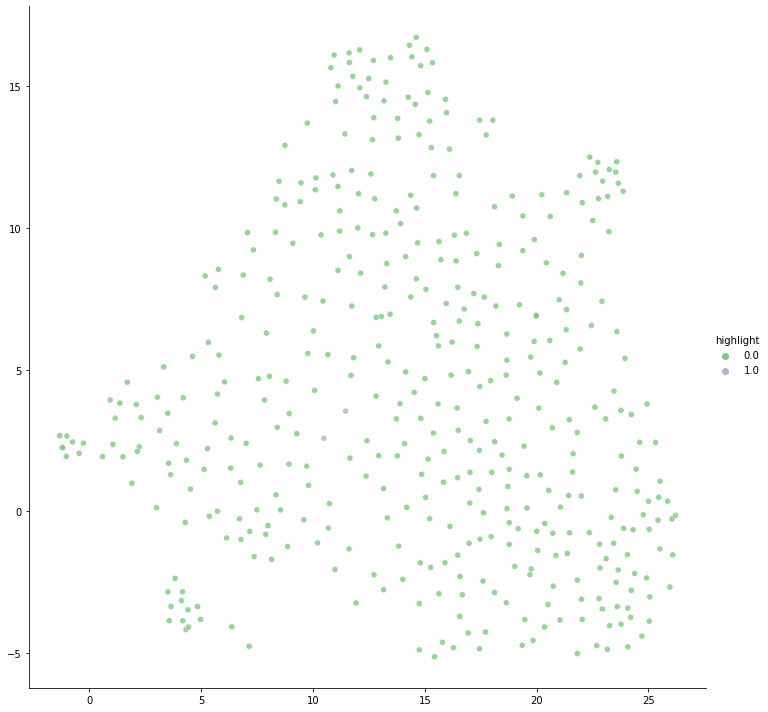

In [18]:
## Choose a cluster to higlight:
cluster_num = 50

data['highlight'] = np.zeros(len(data.index))
data.loc[data['label_kmedoids'] == cluster_num, 'highlight'] = 1

sns.relplot(x = embeddings_umap_2d[:, 0], y = embeddings_umap_2d[:, 1],  hue = data['highlight'], palette = "Accent",alpha = 0.8,height = 10)


# Print Medoids and cluster statistics

In [19]:
# print the medoids 
data.iloc[medoids_indices]      

publishedAt             authorName  \
102  2019-10-10 17:30:48              ronin4713   
74   2019-11-21 16:49:05          Gedanken Fang   
261  2019-07-10 17:50:44        Populist Revolt   
92   2019-09-26 11:48:10            Bob Quigley   
31   2020-01-09 00:32:47         thomas persson   
143  2019-07-12 08:56:48            Rob Manzoni   
5    2020-08-24 13:19:54         Adrian Fewster   
56   2019-11-24 20:24:10          Petasos Coins   
230  2019-07-16 11:45:55               Tom Reid   
315  2019-07-10 21:18:44     Alexander Stephens   
254  2019-07-11 01:14:07           fork in hell   
149  2019-07-12 00:24:06               dakrontu   
308  2019-07-17 06:41:14               WebCideR   
348  2019-07-14 23:04:18              deee fqdd   
36   2020-01-01 10:28:49                Colin W   
385  2019-07-10 16:24:44               Fabrizio   
406  2019-07-10 15:10:17         Daniel Bostock   
144  2019-07-12 02:49:36           Donald Ducko   
269  2019-07-11 05:41:42                  Max T   
17   2020-02-09 02:16:13                    -4*   
389  2019-07-10 15:45:35          yourmanwatson   
51   2019-12-01 20:09:00             nyood mono   
342  2019-08-04 23:15:22               Tom Reid   
330  2019-07-10 16:43:28                 Matt D   
126  2019-12-02 19:25:53                hej la4   
412  2019-07-10 16:05:55          yourmanwatson   
25   2020-01-16 09:38:41         Flyingdutchy33   
67   2019-11-21 16:47:48          Gedanken Fang   
83   2019-11-12 12:20:05          Charles Burns   
45   2019-12-09 20:20:03           Tony Kennedy   
111  2019-12-02 19:14:15                hej la4   
86   2019-11-12 23:14:31              John Weir   
256  2019-07-11 00:21:27        Francois Dupont   
8    2020-08-01 12:26:27            Bertie Blue   
91   2019-09-28 20:20:57            Rory Tennes   
407  2019-07-14 22:52:23               Tom Reid   
172  2019-07-11 13:57:12            Bruce Wayne   
370  2019-07-16 19:03:16     Alexander Stephens   
219  2019-07-10 22:45:34                  Gazza   
109  2019-07-17 09:05:39             David Ward   
115  2019-07-14 08:20:46              HYUKLDER1   
66   2019-12-16 08:46:34          Tomm Wayfarer   
359  2019-07-23 22:05:10            Niall Quinn   
46   2019-12-05 21:13:54             Dave Jones   
192  2019-07-11 09:19:24         Michael Emonds   
396  2019-07-10 15:26:06          yourmanwatson   
90   2019-10-01 23:01:33              John Galt   
277  2019-07-10 17:36:50           Scott Koontz   
236  2019-07-11 16:43:45             Nick Breen   
33   2020-01-06 03:58:17               Dan last   
246  2019-07-15 16:03:10               Tom Reid   
283  2019-07-14 12:30:02           Scott Koontz   
337  2019-07-10 22:38:15  buntovnik bez razloga   
397  2019-07-10 15:17:59            Alex Daniel   
117  2019-07-13 17:32:56       jacob nighthorse   
4    2020-08-26 00:46:38         James Esselman   
233  2019-07-15 20:11:45               Tom Reid   
247  2019-07-10 23:09:47           Scott Koontz   
190  2019-07-11 13:26:03             mokkorista   
209  2019-07-12 09:30:23             Denis Daly   
272  2019-07-10 17:44:55               hfredydl   
241  2019-07-11 13:59:53             Nick Breen   
163  2019-08-04 23:16:40               Tom Reid   
266  2019-07-16 03:59:15                  Max T   
161  2019-07-14 22:49:55               Tom Reid   
357  2019-10-10 07:26:24           TheKopfstand   
178  2019-07-11 10:50:24           David Harris   
395  2019-07-10 15:31:03          Travis bickle   
212  2019-07-10 23:59:41                  Maria   
361  2019-07-17 06:37:38               WebCideR   
58   2020-05-15 05:30:40             Eric Walsh   
331  2019-07-10 16:31:49           Common Sense   
77   2019-11-15 20:03:06                 xchopp   
160  2019-07-11 19:25:36            ArtisanTony   
285  2019-07-11 01:03:45           Scott Koontz   
250  2019-07-10 21:19:44        Patchesmcgee123   
346  2019-07-10 18:46:01        Donald McCarthy   
423  2019-07-10 22:26:14        The

In [20]:
# print statistics for each cluster
data['label_kmedoids'].value_counts().sort_values()
for k,g in data.groupby(by = 'label_kmedoids'):
      print(g.iloc[0]['label_kmedoids'],"number of samples: ",len(g.index),"mean distance from center: ", 100*np.mean(g['distance_kmedoids']), "Proportion of replies:", 100*np.sum(g['isReply'])/len(g.index))

0 number of samples:  2 mean distance from center:  0.0006496906280517578 Proportion of replies: 100.0
1 number of samples:  2 mean distance from center:  0.0008314847946166992 Proportion of replies: 100.0
2 number of samples:  2 mean distance from center:  0.0013470649719238281 Proportion of replies: 0.0
3 number of samples:  3 mean distance from center:  0.0002662340875758673 Proportion of replies: 33.333333333333336
4 number of samples:  6 mean distance from center:  0.001519918441772461 Proportion of replies: 50.0
5 number of samples:  16 mean distance from center:  0.0006806105375289917 Proportion of replies: 43.75
6 number of samples:  9 mean distance from center:  0.0002357694938837085 Proportion of replies: 77.77777777777777
7 number of samples:  8 mean distance from center:  0.0010833144187927246 Proportion of replies: 37.5
8 number of samples:  13 mean distance from center:  0.00046812569962639827 Proportion of replies: 92.3076923076923
9 number of samples:  4 mean distance f

# Print Cluster
Print the comments within a cluster. Comments are sorted by their distance from the cluster medoid

In [22]:
# Choose a cluster to print
cluster_number =   50
# Choose the number of samples to print
number_of_samples_to_print = 500

data['label_kmedoids'] = data['label_kmedoids'].astype('category')
cluster = data[data['label_kmedoids']==cluster_number]
if cluster["text"].count()<=number_of_samples_to_print:
  number_of_samples_to_print = cluster["text"].count()

cluster = cluster.sort_values(by='distance_kmedoids')

print("Number of samples in the cluster:", cluster["text"].count())
print("Average Distance from cluster center:", np.mean(cluster['distance_kmedoids']))
cluster


Number of samples in the cluster: 2
Average Distance from cluster center: 1.2725592e-05


publishedAt    authorName  \
246  2019-07-15 16:03:10      Tom Reid   
108  2019-07-17 09:08:31  Nigel Rushby   

                                                                                                                                             text  \
246    redfegxalo Name them. There are very few and even fewer of them have any credibility whatsoever as the majority are in the pay of deniers.   
108  @David Ward - I think some of them are away with the proverbial fairies, especially the ones who carry a lute around with them .... barking!   

     isReply  \
246        1   
108        1   

                                                                                                                                     cleaned  \
246     Name them. There are very few and even fewer of them have any\ncredibility whatsoever as the majority are in the pay of deniers.\n\n   
108  @ - I think some of them are away with the proverbial fairies,\nespecially the ones who carry a lute around with them .... barking!\n\n   

     label_manual label_kmedoids  distance_kmedoids  highlight  
246          -1.0             50       1.788139e-07        1.0  
108          -1.0             50       2.527237e-05        1.0

# Assign Cluster labels manually
cluster_number: which cluster would you like to assign labels to?
min_distance: the minimum distance from the cluster medoid be for a data point to still get the specified label
max_distance: the maximum distance from the cluster medoid be for a data point to still get the specified label
label_manual: your label

In [23]:
#which cluster would you like to assign labels to?
cluster_number = 50
#your label
label_manual = 'cluster 50'
#the minimum distance from the cluster medoid be for a data point to still get the specified label
min_distance = 0
#the maximum distance from the cluster medoid be for a data point to still get the specified label
max_distance = 1000

# 2. Filter data by cluster label and specified label to filtered data
data.loc[(data['label_kmedoids']==cluster_number) & (data['distance_kmedoids'] <= max_distance) & (data['distance_kmedoids'] >= min_distance),  'label_manual'] = label_manual

In [24]:
data[data['label_kmedoids']==cluster_number].sort_values(by='distance_kmedoids')

publishedAt    authorName  \
246  2019-07-15 16:03:10      Tom Reid   
108  2019-07-17 09:08:31  Nigel Rushby   

                                                                                                                                             text  \
246    redfegxalo Name them. There are very few and even fewer of them have any credibility whatsoever as the majority are in the pay of deniers.   
108  @David Ward - I think some of them are away with the proverbial fairies, especially the ones who carry a lute around with them .... barking!   

     isReply  \
246        1   
108        1   

                                                                                                                                     cleaned  \
246     Name them. There are very few and even fewer of them have any\ncredibility whatsoever as the majority are in the pay of deniers.\n\n   
108  @ - I think some of them are away with the proverbial fairies,\nespecially the ones who carry a lute around with them .... barking!\n\n   

    label_manual label_kmedoids  distance_kmedoids  highlight  
246   cluster 50             50       1.788139e-07        1.0  
108   cluster 50             50       2.527237e-05        1.0